In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-data/heart-disease.csv


In [2]:
import os

# Create the folder only if it doesn't exist
if not os.path.exists("heart_disease_project"):
    os.mkdir("heart_disease_project")


In [3]:
cd heart_disease_project

/kaggle/working/heart_disease_project


## predicting heart disease using machine learning 

what approach we are going to take:
1. problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem defination 
>Given clinical parameters about a patient , can we predict whether the patient has a heart disease or not.

## Data 
>the data is taken from the kaggle dataset heart disease data . 

## Evaluation 
>if we could get to a 95% accuracy at predicting whether a patient has a heart disease or not , we will consider the model.


## Features

* **age** — Age in years  
* **sex** — 1 = male, 0 = female  
* **cp** — Chest pain type  
  - 1 = typical angina  
  - 2 = atypical angina  
  - 3 = non-anginal pain  
  - 4 = asymptomatic  
* **trestbps** — Resting blood pressure (mm Hg)  
* **chol** — Serum cholesterol (mg/dl)  
* **fbs** — Fasting blood sugar > 120 mg/dl  
  - 1 = true  
  - 0 = false  
* **restecg** — Resting electrocardiographic results  
  - 0 = normal  
  - 1 = ST-T wave abnormality  
  - 2 = left ventricular hypertrophy  
* **thalach** — Maximum heart rate achieved  
* **exang** — Exercise induced angina  
  - 1 = yes  
  - 0 = no  
* **oldpeak** — ST depression induced by exercise relative to rest  
* **slope** — Slope of the peak exercise ST segment  
  - 1 = upsloping  
  - 2 = flat  
  - 3 = downsloping  
* **ca** — Number of major vessels (0–3) colored by fluoroscopy  
* **thal** — Thalassemia  
  - 3 = normal  
  - 6 = fixed defect  
  - 7 = reversible defect  
* **target** — Diagnosis of heart disease  
  - 0 = < 50% diameter narrowing (no disease)  
  - 1 = > 50% diameter narrowing (disease present)  



## Preparing the tools 


In [4]:
# we are going to use pandas , numpy , matplotlib for data analysis and maipulation

#Regualar EDA (exploratory data analysis) and plotting libraries 

import pandas as pd 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

# models from sklearn 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluation 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

# A confusion matrix is a table that shows how well a classification
# model is performing by comparing the actual labels vs the predicted labels.

from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay




In [5]:

df = pd.read_csv("/kaggle/input/heart-disease-data/heart-disease.csv")

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data

1. What question(s) are you trying to solve.
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it.
4. where are the outliers and why should you care about them.
5. How can you add , change or remove features to get more out of your data. 



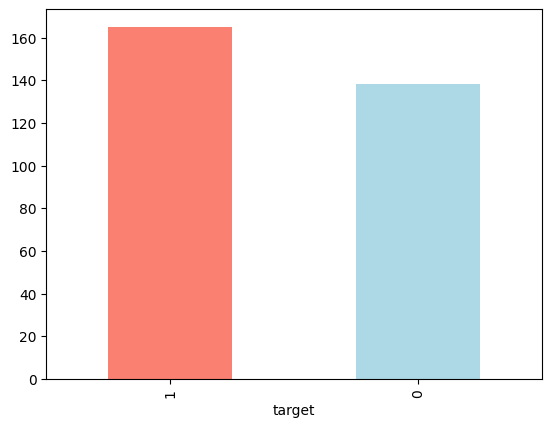

In [6]:
df["target"].value_counts().plot(kind="bar" , color = ["salmon" , "lightblue"]) ; 

## Heart disease Frequency according to sex 

In [7]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [8]:
# compare target column with sex column 

pd.crosstab(df["target"] , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


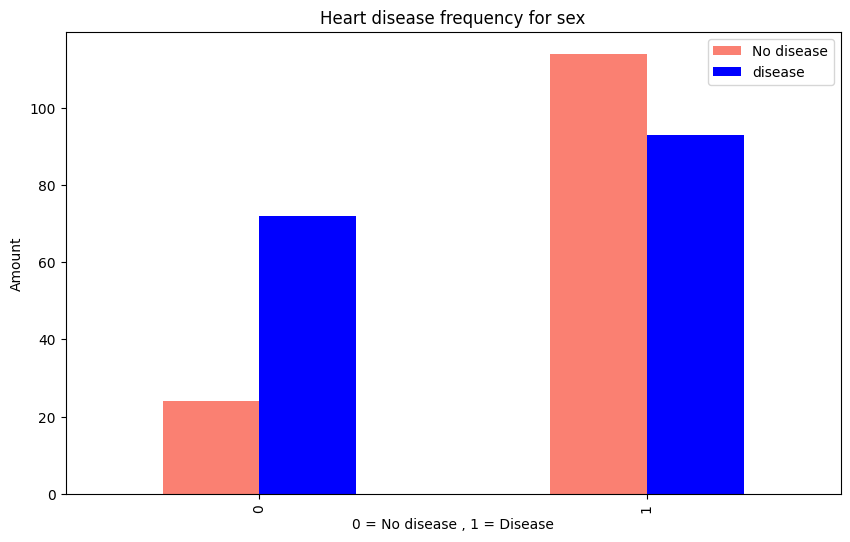

In [9]:
# create a plot of the cross tab 
pd.crosstab(df.sex , df.target).plot(kind="bar" , 
                                     color = ["salmon" , "blue"] , 
                                     figsize = (10,6)
                                    ) ; 

plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["No disease" , "disease"]) ; 

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

## Age vs max heart rate for a heart disease 

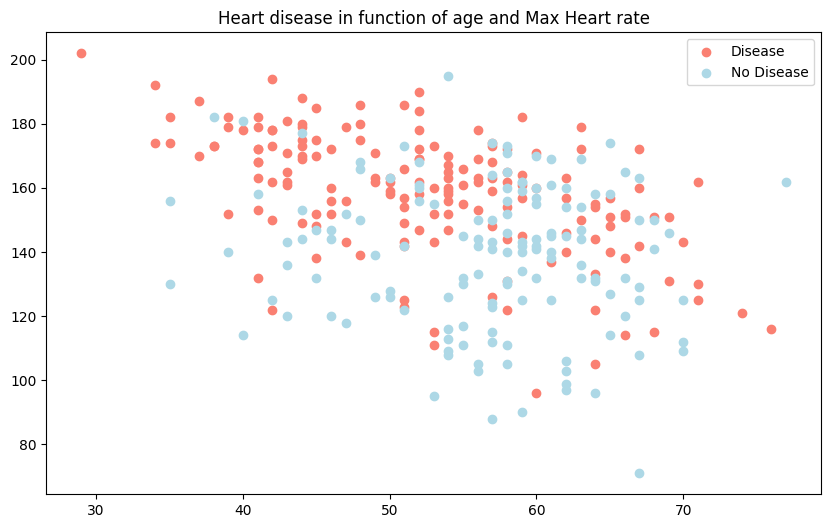

In [11]:
# age vs thalach 

plt.figure(figsize = (10,6))

# scatter with positive examples that is them having heart disease 
plt.scatter(df.age[df.target == 1] , 
           df.thalach[df.target == 1] , 
           c = "salmon")

# scatter with negaative examples that is them not having heart disease 

plt.scatter(df.age[df.target == 0] , 
           df.thalach[df.target == 0] , 
           c = "lightblue")

plt.title("Heart disease in function of age and Max Heart rate") ;  
plt.legend(["Disease" , "No Disease"])

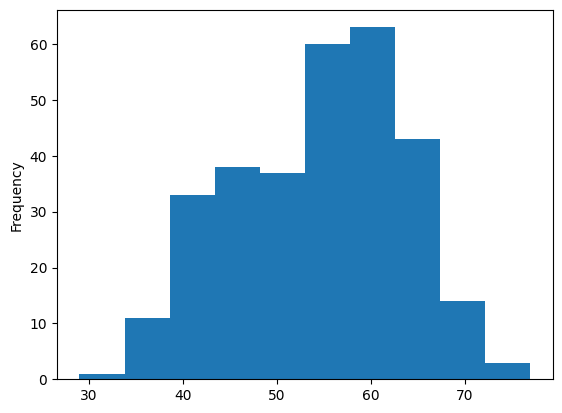

In [12]:
# check the distribution of the age column with the histogram 
df.age.plot.hist() ; 

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Heart disease frequency per chest pain type 

cp — Chest pain type

0 = typical angina

1 = atypical angina

2 = non-anginal pain

3 = asymptomatic

In [14]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


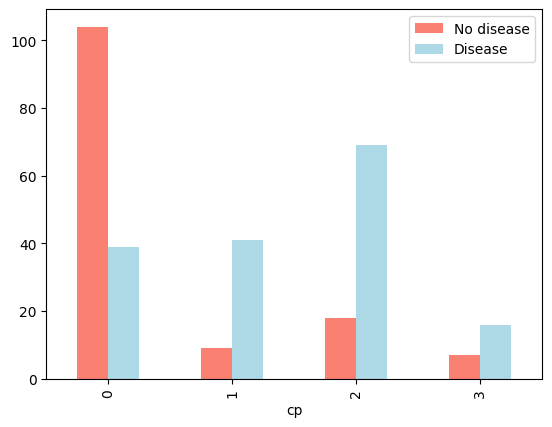

In [15]:
# In a pandas crosstab, the first argument (rows) becomes the x‑axis categories when you plot,
# and the second argument (columns) becomes the legend entries.

pd.crosstab(df.cp , df.target).plot(kind="bar" ,
                                    color=["salmon" , "lightblue"])

plt.legend(["No disease" , "Disease"])


<Axes: xlabel='sex'>

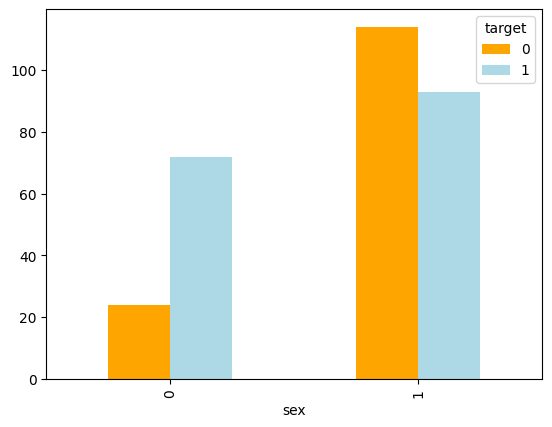

In [16]:
pd.crosstab(df.sex ,  df.target).plot(kind = "bar" , color = ["orange" , "lightblue"])



In [17]:
pd.crosstab(df.sex , df.target)

target,0,1
sex,,
0,24,72
1,114,93


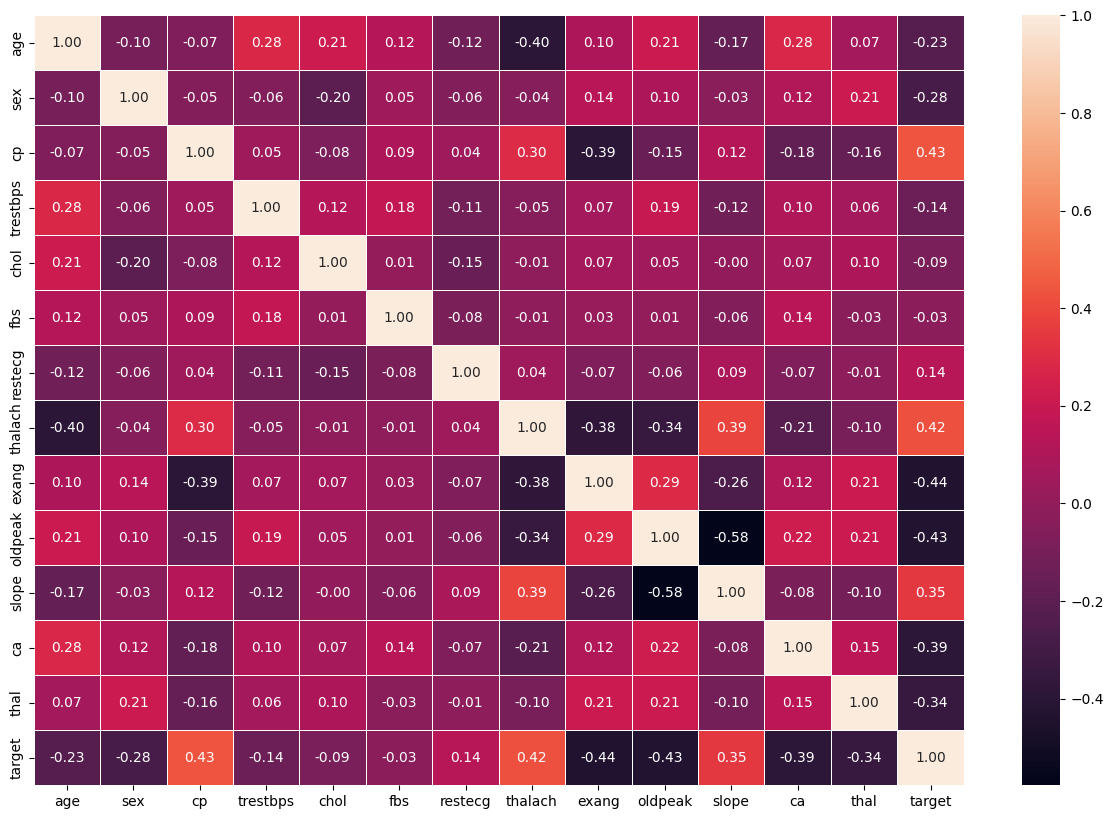

In [18]:
# making correlation matrix and using seaborn to design it a bit 

corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_matrix , 
                annot = True , 
                linewidths = 0.5 , 
                fmt = '0.2f',
                #cmap = "YlGnBu"
                )


## Modelling

In [19]:
x = df.drop("target" , axis = 1)
y = df["target"]


In [20]:
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

Models we are going to try are :

1. `Logistic Regression`
2. `K nearest neighbours classifier`
3. `Random Forest Classifier`



In [21]:
# making a dictionary which contains all my models to be used 

models = {
    "logisticregression" : LogisticRegression(max_iter = 1000) , 
    "KNN" : KNeighborsClassifier(),
    "RandomForest" : RandomForestClassifier()
}

model_scores = {} 

# function to fit and score models 

def fit_and_score(models , x_train , x_test , y_train , y_test):
    """
    Fits and evaluates given machine learning models 
    models : dictionary of models to be used 
    x_train : training data(no labels)
    x_test : test data (no labels)
    y_train : training labels 
    y_test : testing labels
    """
    
    for name , model in models.items():
        np.random.seed(42)

        # fitting the model 
        model.fit(x_train , y_train)
        # scoring the model and storing it in a dictionary named model_scores

        
        model_scores[name] = model.score(x_test , y_test)

    return model_scores
        
        




In [22]:
fit_and_score(models , x_train , x_test , y_train , y_test)

{'logisticregression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

## Model Comparision

<Axes: >

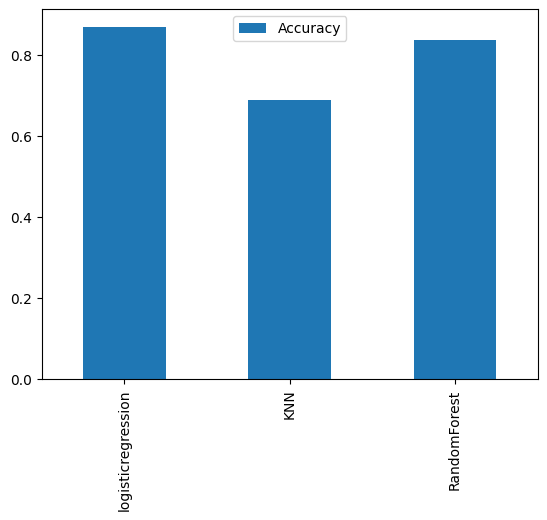

In [23]:
model_comparision = pd.DataFrame(model_scores , index = ["Accuracy"]) 
model_comparision.T.plot(kind = "bar")

This is the baseline model 

Now we will look at the following to enhance the model :
1. `Hyperparameter Tuning`
2. `Feature importance`
3. `Confusion matrix`
4. `Cross Validation`
5. `Precision`
6. `Recall`
7. `F1 score`
8. `classification Report`
9. `Roc Curve`
10. `Area Under the curve`


## Hyperparameter tuning (by hand as its just 1)

In [24]:
# Tuning knn 

train_scores = []
test_scores = []

# create a list of different values for n_neighbours
neighbours = range(1,21) #trying the n_neighbours parameter from 1 to 20 

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train , y_train)

    # update the scores list 
    train_scores.append(knn.score(x_train , y_train))
    test_scores.append(knn.score(x_test , y_test))
    


In [25]:
pd.DataFrame(test_scores , index = range(1 , len(test_scores)+1))

,0
1,0.622951
2,0.639344
3,0.655738
4,0.672131
5,0.688525
6,0.721311
7,0.704918
8,0.688525
9,0.688525
10,0.704918


Maximum Knn score on the test data : 75.41%


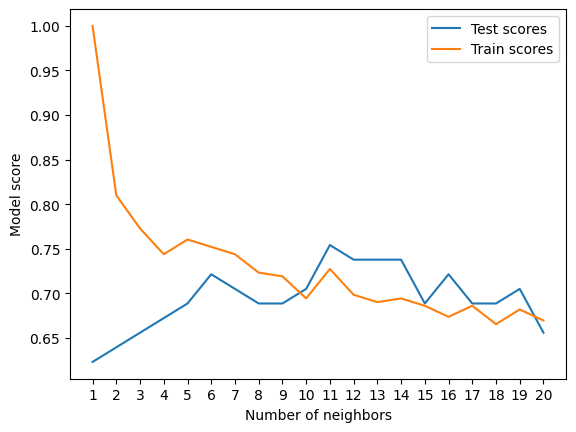

In [26]:
plt.plot(neighbours , test_scores , label = "Test scores")
plt.plot(neighbours , train_scores , label = "Train scores")
plt.xticks(range(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum Knn score on the test data : {max(test_scores)*100:.2f}%")

`The knn score by the default parameter was something 68 now at neighbor 11 it is 75.41 although its still less than logistic.` 

## HyperTuning tuning with RandomizedSearchCV
Tuning the following:
* LogisticRegression
* RandomForestClassifier

In [27]:
# create a Hyperparameter grid for Logistic Regression 
log_reg_grid = {
    "C" : np.logspace(-4 , 4 , 20) , 
    "solver" : ["liblinear"]
}

# create a hyperparameter grid for RandomForestClassifier 
random_forest_grid = {
    "n_estimators" : np.arange(10 , 1000 , 50) , 
    "max_depth": [None , 3 , 5 , 10] , 
    "min_samples_split" : np.arange(2, 20 , 2) , 
    "min_samples_leaf" : np.arange(1, 20 , 2) , 
    
}

In [28]:
# Tune Logistic regression 

np.random.seed(42)

# setup random hyperparameter search for logistic regression 

rs_log_reg = RandomizedSearchCV(LogisticRegression() , 
                               param_distributions = log_reg_grid , 
                               cv = 5 , 
                               n_iter = 20 ,  
                               verbose = True)

rs_log_reg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_log_reg.score(x_test , y_test)

0.8852459016393442

In [31]:
# Tune RandomForestClassifier 

np.random.seed(42)

rs_random_forest = RandomizedSearchCV(RandomForestClassifier() , 
                                     param_distributions = random_forest_grid , 
                                     cv = 5 , 
                                     n_iter = 20 ,
                                     verbose = True )

rs_random_forest.fit(x_train , y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
rs_random_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [33]:
rs_random_forest.score(x_test , y_test)

0.8688524590163934

## Hyperparameter tuning with gridsearchcv



In [34]:
# grid_search_randomforest = GridSearchCV(RandomForestClassifier() , 
#                                         param_grid = random_forest_grid , 
#                                         cv = 5 , 
#                                         verbose = True)

# grid_search_randomforest.fit(x_train , y_train)

In [35]:
grid_search_lg = GridSearchCV(LogisticRegression() , 
                             param_grid = log_reg_grid , 
                             cv = 5 , 
                             verbose = True)

grid_search_lg.fit(x_train , y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
grid_search_lg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [37]:
grid_search_lg.score(x_test , y_test)

0.8852459016393442